In [ ]:
# !pip install h5py
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas
# !pip install sklearn
# !pip install numpy
# !pip install scipy
# !pip install sleap==1.2.6

In [7]:
import h5py
import numpy as np
import sleap
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
path = "displacement_analysis.h5"

def describe_hdf5(filename, attrs=True):
    """Utility to describe all items in an HDF5 file."""
    def desc(k, v):
        if type(v) == h5py.Dataset:
            print(f"[ds]  {v.name}: {v.shape} | dtype = {v.dtype}")
            if attrs and len(v.attrs) > 0:
                print(f"      attrs = {dict(v.attrs.items())}")
        elif type(v) == h5py.Group:
            print(f"[grp] {v.name}:")
            if attrs and len(v.attrs) > 0:
                print(f"      attrs = {dict(v.attrs.items())}")

    with h5py.File(filename, "r") as f:
        f.visititems(desc)
        
describe_hdf5(path)

[ds]  /edge_inds: (6, 2) | dtype = int64
[ds]  /edge_names: (6, 2) | dtype = |S9
[ds]  /instance_scores: (2, 54546) | dtype = float64
[ds]  /node_names: (6,) | dtype = |S9
[ds]  /point_scores: (2, 6, 54546) | dtype = float64
[ds]  /track_names: (2,) | dtype = |S7
[ds]  /track_occupancy: (54546, 2) | dtype = uint8
[ds]  /tracking_scores: (2, 54546) | dtype = float64
[ds]  /tracks: (2, 2, 6, 54546) | dtype = float64


In [9]:
with h5py.File(path) as f:
    tracks = f["tracks"][:]

tracks = np.transpose(tracks, [3, 0, 2, 1])
tracks.shape

(54546, 2, 6, 2)

In [16]:
labels = sleap.load_file("/home/ricardo/SLEAP_Data/predictions/video.AVI.predictions_12.slp")
labels

Labels(labeled_frames=54546, videos=1, skeletons=1, tracks=2)

In [17]:
tracks = labels.numpy()
tracks.shape

(54546, 2, 6, 2)

In [18]:
# Labeled frames can be accessed using [] indexing
labeled_frame = labels[100]
labeled_frame

LabeledFrame(video=MediaVideo('/home/ricardo/SLEAP_Data/videos/video.AVI'), frame_idx=100, instances=2)

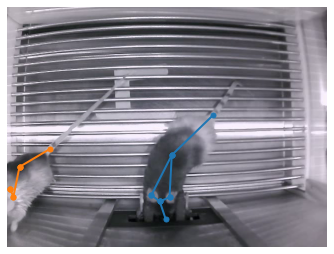

In [19]:
# Visualize the labeled frame
labeled_frame.plot(scale=0.5)

In [20]:
# Instances from a labeled frame can be converted to numpy arrays together...
labeled_frame.numpy().shape

(2, 6, 2)

In [21]:
# ... or individually:
predicted_instance = labeled_frame[0]
predicted_instance.numpy()

rec.array([[324.16174316, 380.47122192],
           [287.82583618, 376.15002441],
           [316.35479736, 423.75695801],
           [412.00210571, 215.44937134],
           [328.54766846, 296.20223999],
           [304.60998535, 388.68737793]],
          dtype=float64)

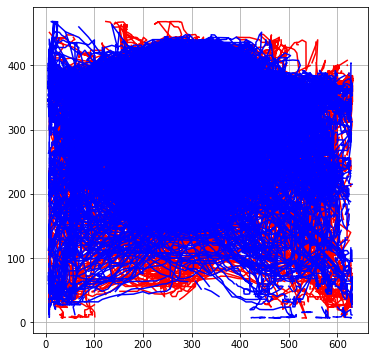

In [24]:
# Trajectory across for all frames
plt.figure(figsize=(6, 6))
for j in range(tracks.shape[2]):
    plt.plot(tracks[:, 0, j, 0], tracks[:, 0, j, 1], "r-")
for j in range(tracks.shape[2]):
    plt.plot(tracks[:, 1, j, 0], tracks[:, 1, j, 1], "b-")
plt.grid(True);

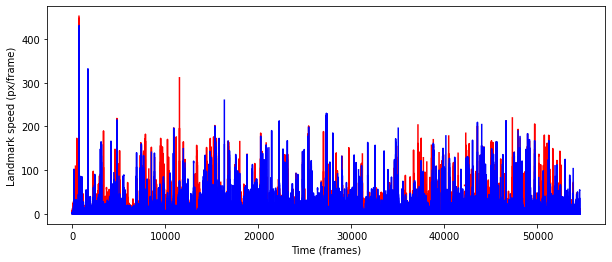

In [25]:
# Landmark-wise speed over time
speeds = np.linalg.norm(np.diff(tracks, axis=0), axis=3)  # (time, tracks, nodes)

plt.figure(figsize=(10, 4))
for j in range(tracks.shape[2]):
    plt.plot(speeds[:, 0, j], "r-")
for j in range(tracks.shape[2]):
    plt.plot(speeds[:, 1, j], "b-")
plt.xlabel("Time (frames)")
plt.ylabel("Landmark speed (px/frame)");